In [2]:
# prompt: 如何读取excel数据

!pip install pandas
!pip install openpyxl

import pandas as pd


In [4]:
# 读取Excel文件
df = pd.read_excel('附件一：已结束项目任务数据.xls')  # 将'your_file.xlsx'替换为你实际的文件名

from geopy.distance import geodesic

# 定义目标点的经纬度
target_coordinates = (23.1089, 113.2647)

# 计算距离并添加到DataFrame中
df['distance'] = df.apply(lambda row: geodesic((row["latitude"], row["longitude"]), target_coordinates).km, axis=1)

# 打印结果
print(df['distance'].min(), df['distance'].max())

0.671992858762101 139.12944683144616


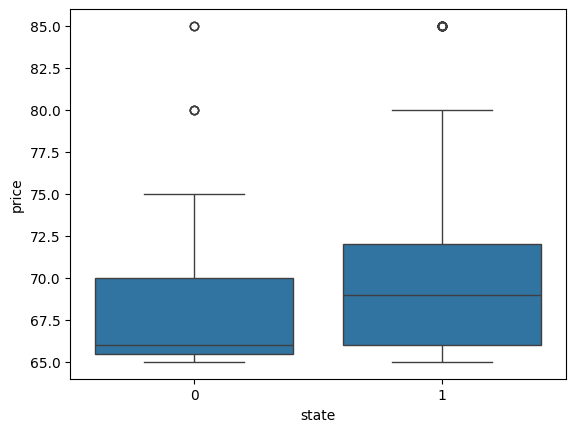

In [7]:
# prompt: 很好！我还需要做另一张图表，我需要画关于price和state的箱型图

import seaborn as sns
import matplotlib.pyplot as plt

# 绘制关于price和state的箱型图
sns.boxplot(x='state', y='price', data=df)
plt.savefig('boxplot.png')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0       27
1       94
2       27
3       70
4       27
      ... 
830     31
831     17
832     44
833     20
834    131
Name: cluster, Length: 835, dtype: int32


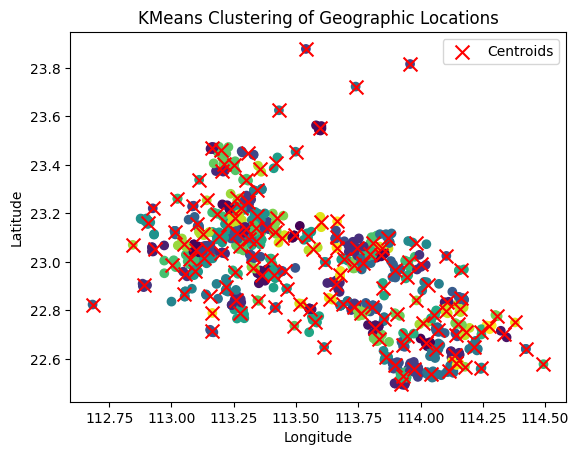

In [15]:
# prompt: 谢谢你！我需要使用kmeans聚类算法对地理位置的经纬度进行聚类

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 提取经纬度数据
coordinates = df[['latitude', 'longitude']].values

# 创建KMeans模型，指定聚类数量
n_clusters = 150  # 替换为你想要的聚类数量
kmeans = KMeans(n_clusters=n_clusters)

# 对经纬度数据进行聚类
df['cluster'] = kmeans.fit_predict(coordinates)
print(df['cluster'])

# 可视化聚类结果
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=100, c='red', marker='x', label='Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans Clustering of Geographic Locations')
plt.legend()
plt.savefig('kmeans.png')


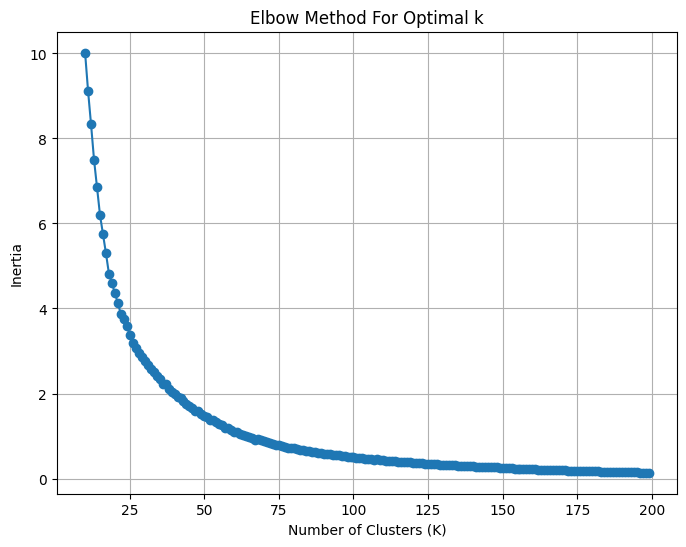

In [13]:
# 定义K值的范围

k_values = range(10, 200)

# 初始化一个列表来存储每个K值对应的惯性值

inertia_values = []

# 对每个K值运行K均值聚类算法，并记录惯性值

for k in k_values:

    kmeans = KMeans(n_clusters=k, n_init=20)

    kmeans.fit(coordinates)

    inertia_values.append(kmeans.inertia_)

# 绘制肘部曲线

plt.figure(figsize=(8, 6))

plt.plot(k_values, inertia_values, marker='o')

plt.xlabel('Number of Clusters (K)')

plt.ylabel('Inertia')

plt.title('Elbow Method For Optimal k')

plt.grid(True)

plt.savefig('elbow.png')